In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import dabl

C:\Users\darsh\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


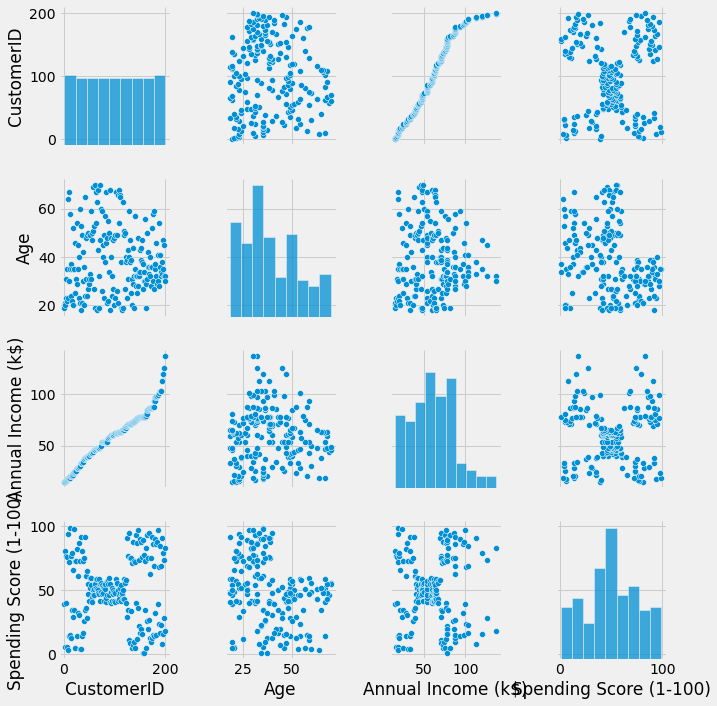

In [5]:
sns.pairplot(data)
plt.show()

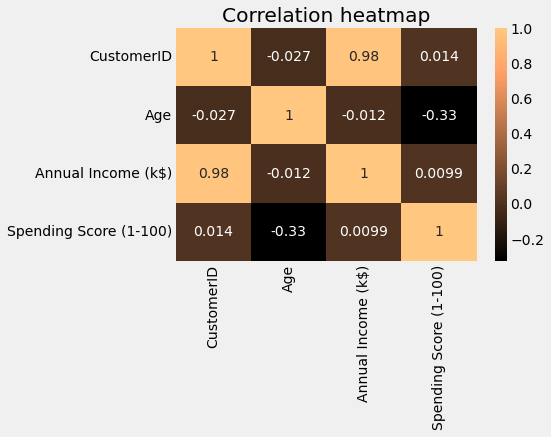

In [6]:
sns.heatmap(data.corr(), annot = True, cmap = 'copper')
plt.title('Correlation heatmap')
plt.show()

Target looks like regression


C:\Users\darsh\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.55E-02'}, xlabel='Spending Score (1...', ylabel='Gender'>]],
       dtype=object)]

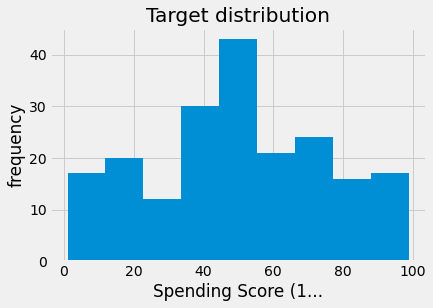

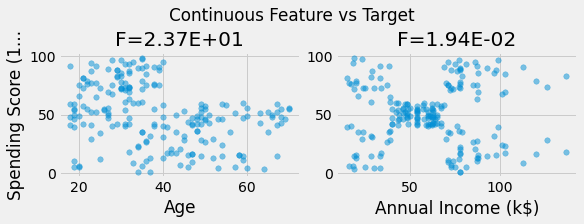

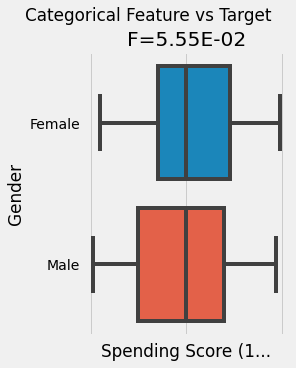

In [7]:
dabl.plot(data, target_col = 'Spending Score (1-100)')

Target looks like regression


C:\Users\darsh\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[array([[<AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Spending Score (1...'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=9.37E-03'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

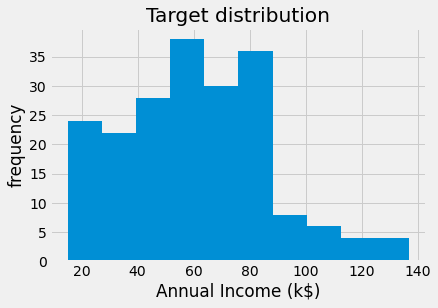

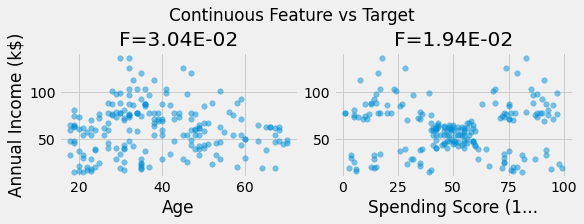

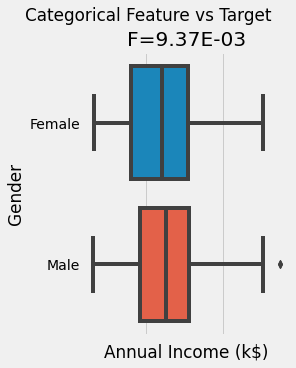

In [8]:
dabl.plot(data, target_col = 'Annual Income (k$)')

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [11]:
data.isnull().sum().sum()

0

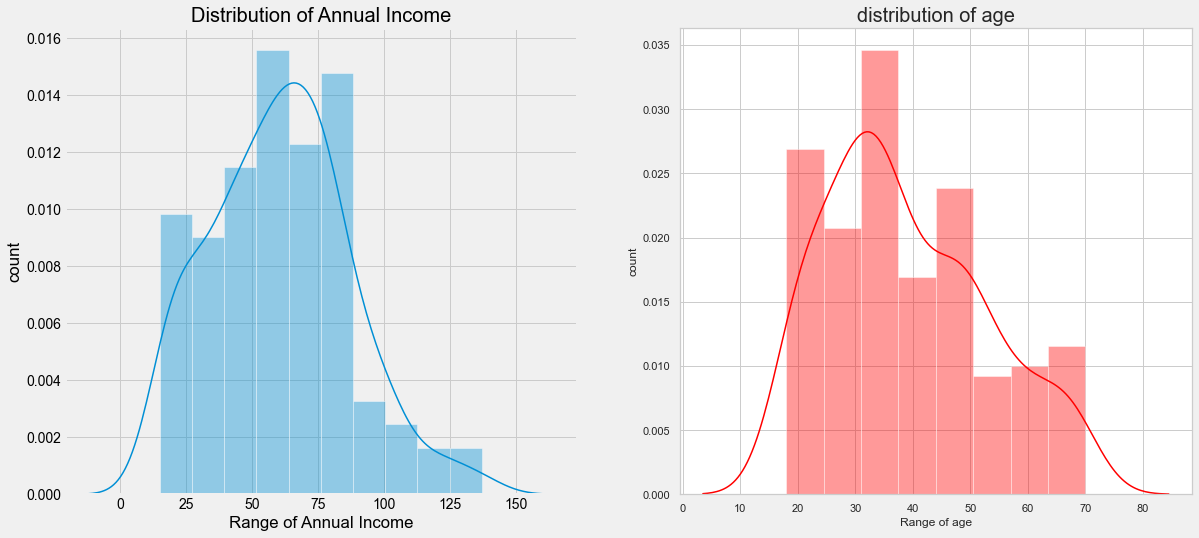

In [12]:
#Data Visulization
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']= (18,8)

plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.distplot(data['Age'], color = 'red')
plt.title('distribution of age',fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('count')
plt.show()

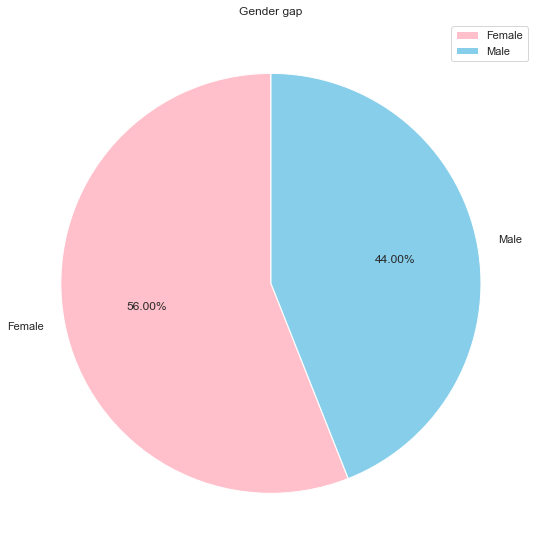

In [21]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['pink','skyblue']
explode = [0,0.001]
plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, labels = labels, colors = colors, explode = explode, startangle = 90, autopct = '%.2f%%')
plt.title('Gender gap')
plt.axis('off')
plt.legend()
plt.show()

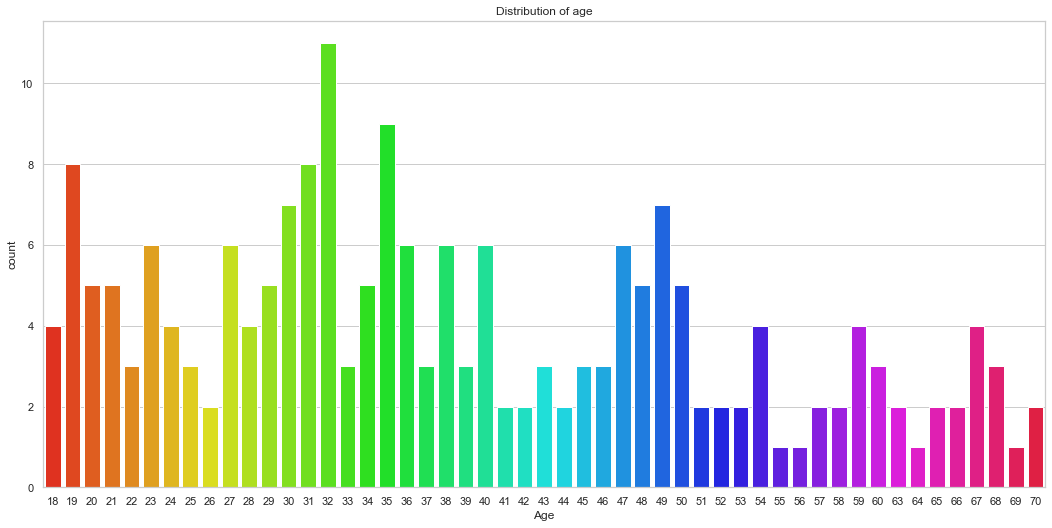

In [23]:
plt.rcParams['figure.figsize'] = (16,8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of age')
plt.show()

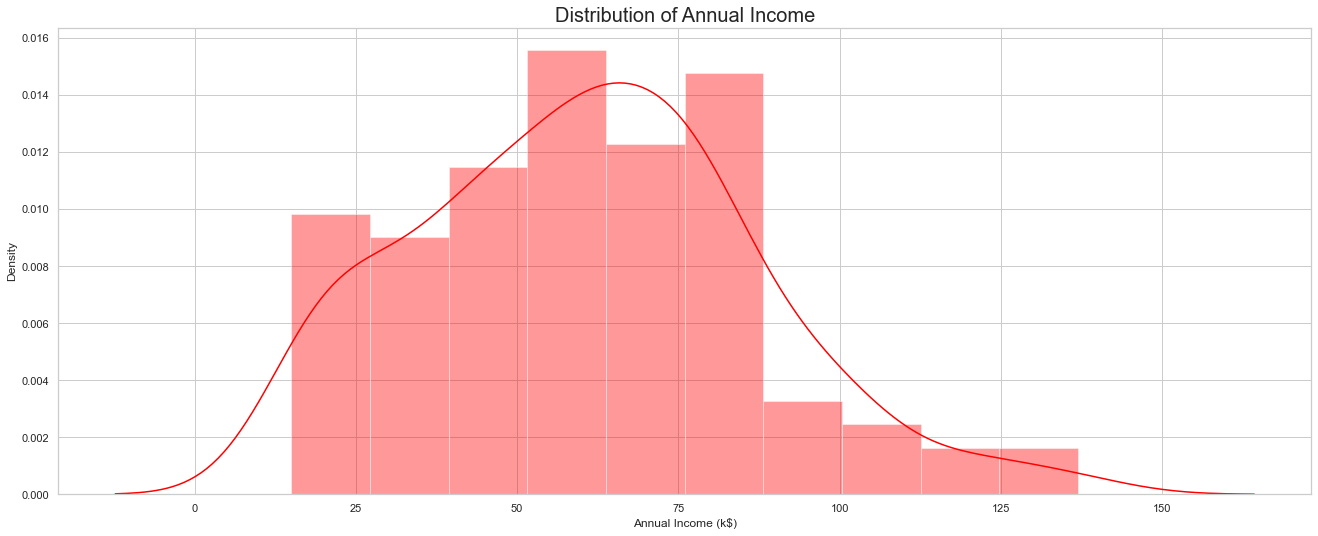

In [25]:
plt.rcParams['figure.figsize'] = (20,8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize =20)
plt.show()

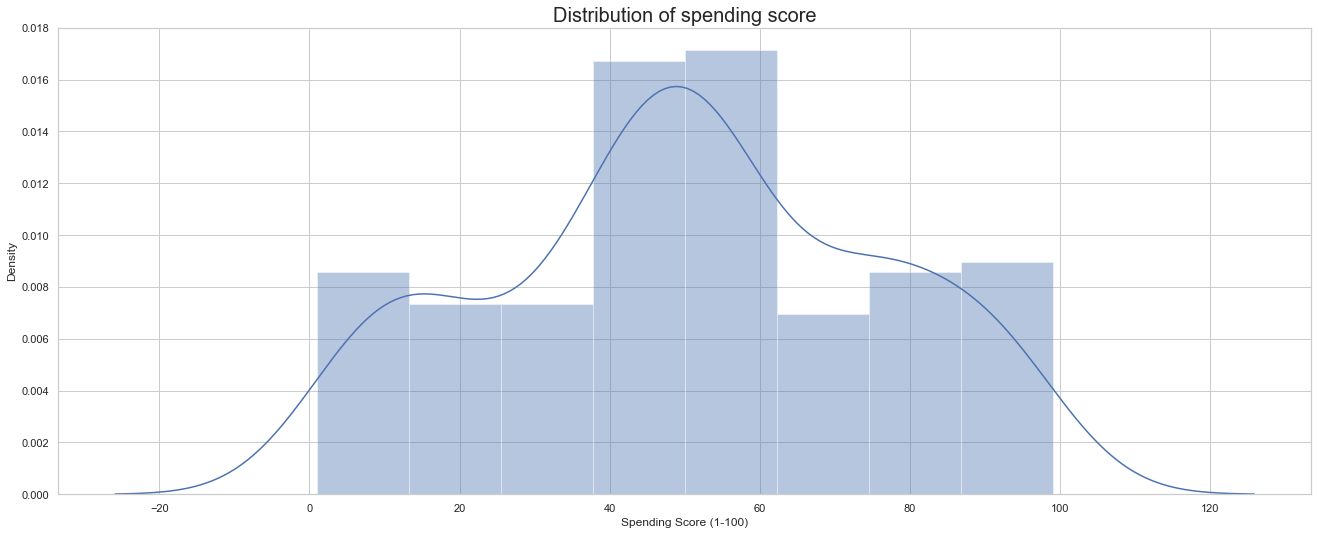

In [28]:
plt.rcParams['figure.figsize'] = (20,8)
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of spending score', fontsize = 20)
plt.show()


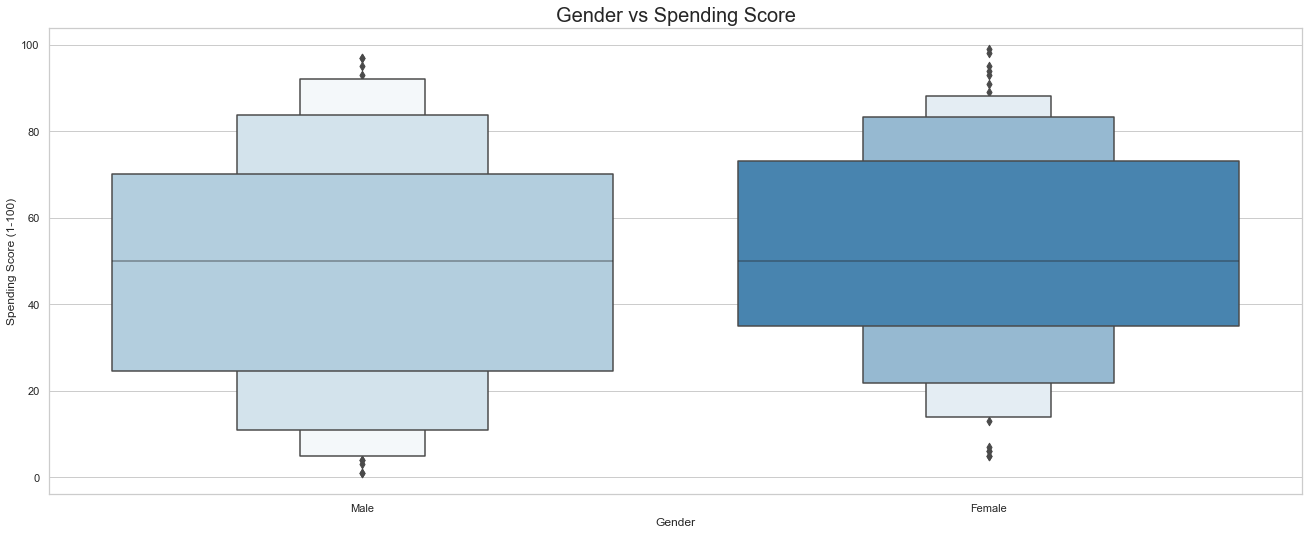

In [30]:
plt.rcParams['figure.figsize'] = (20,8)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette ='Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()


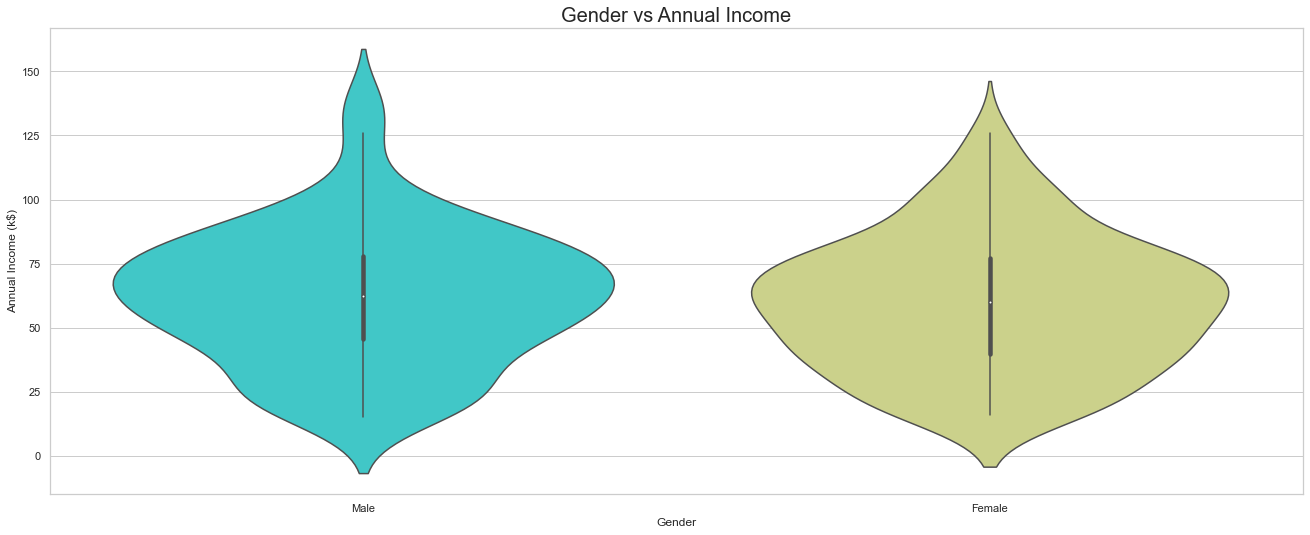

In [31]:
sns.violinplot(data['Gender'],data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

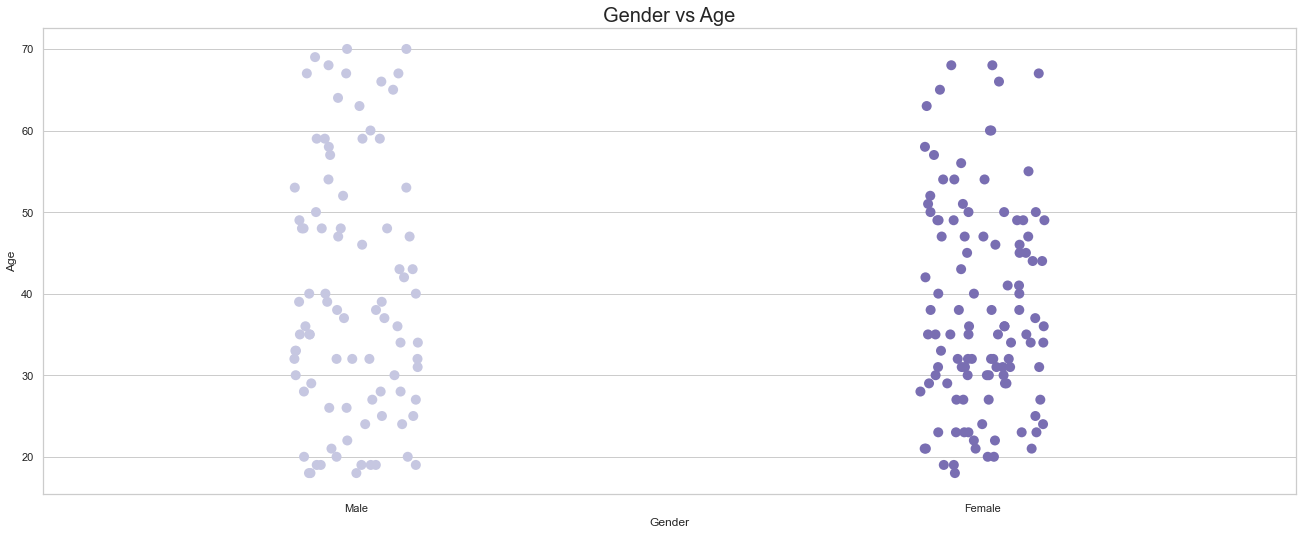

In [33]:
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

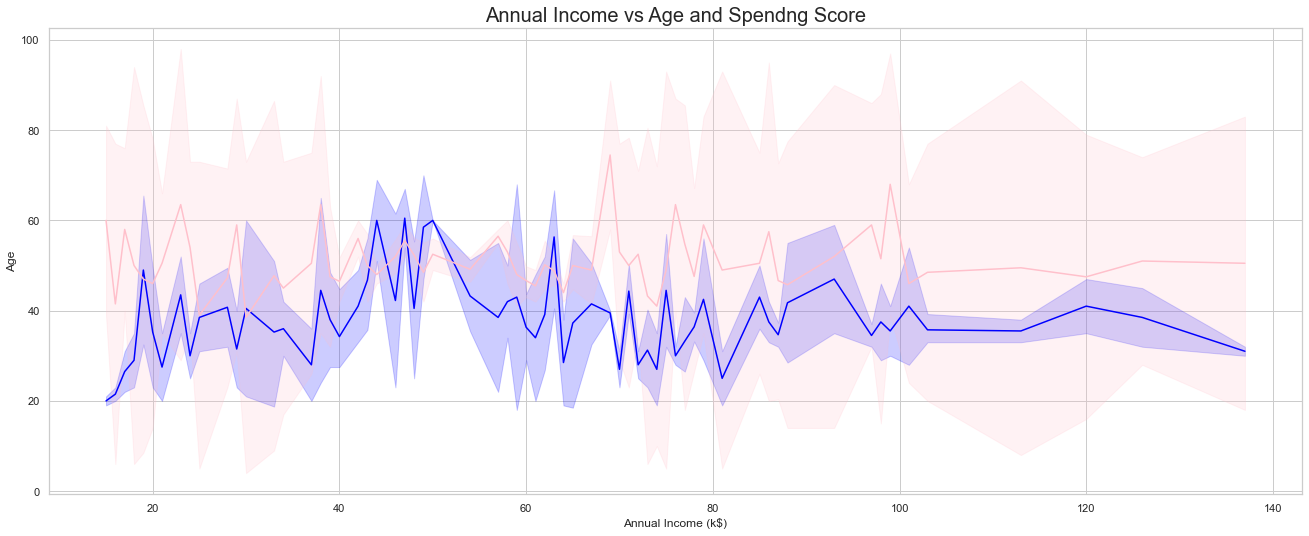

In [35]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x,y,color = 'blue')
sns.lineplot(x,z,color = 'pink')
plt.title('Annual Income vs Age and Spendng Score', fontsize = 20)
plt.show()


In [37]:
#cluster Analysis
import warnings
warnings.filterwarnings('ignore')

x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

print(x.shape)

(200, 2)


In [39]:
x_data = pd.DataFrame(x)
x_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


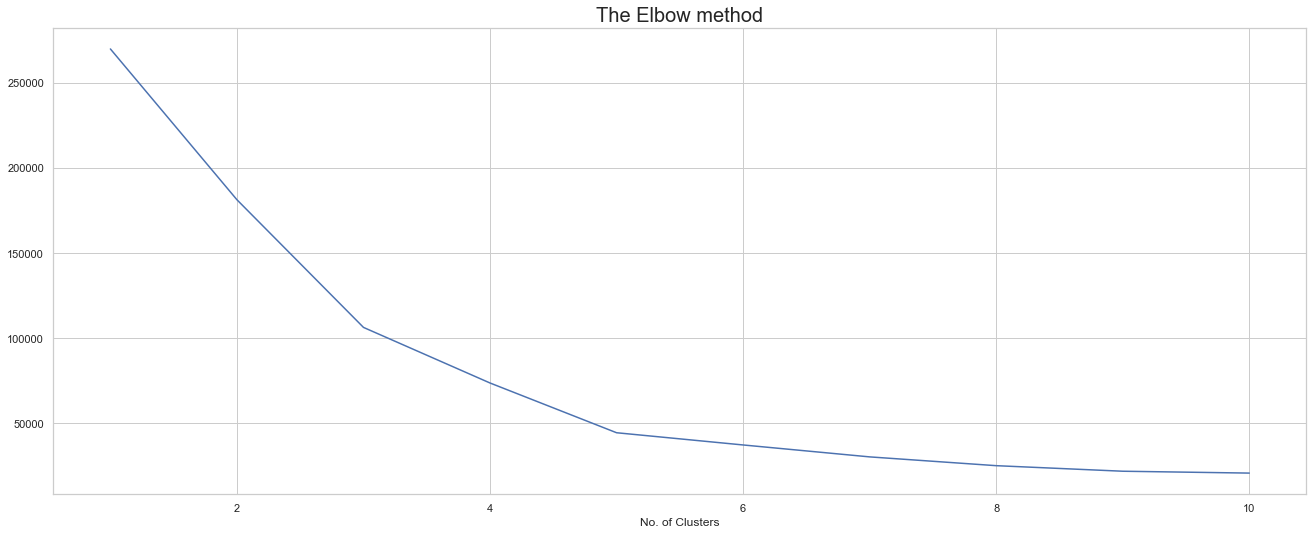

In [45]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.show()

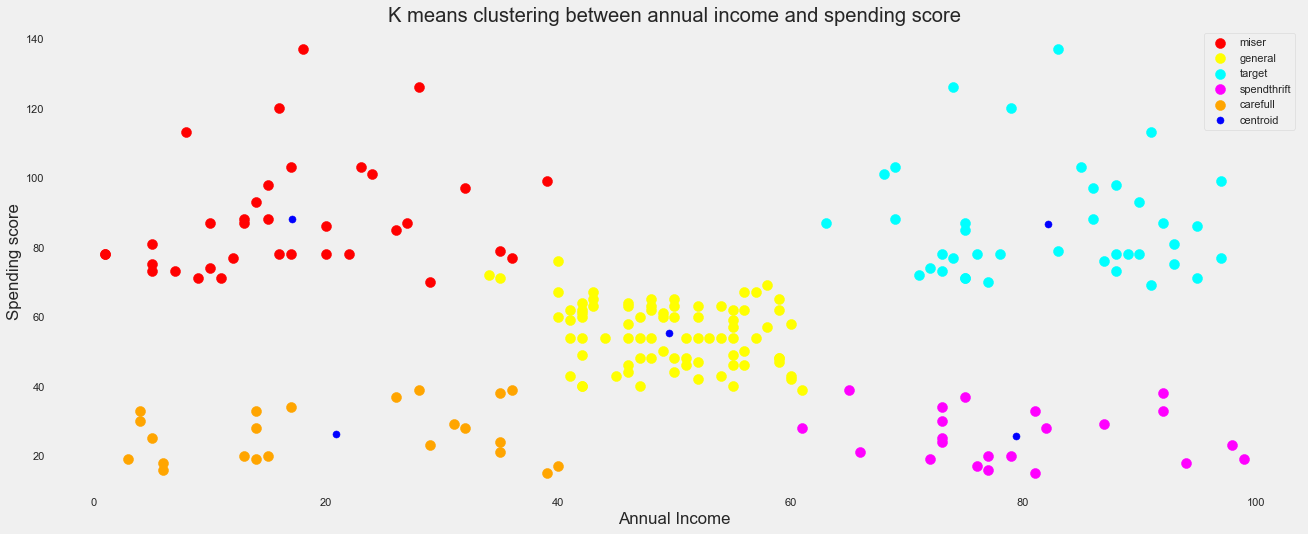

In [49]:
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c='red', label = 'miser')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c='yellow', label = 'general')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c='cyan', label = 'target')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, c='magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s = 100, c='orange', label = 'carefull')
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centroid')
plt.title('K means clustering between annual income and spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.grid()
plt.show()

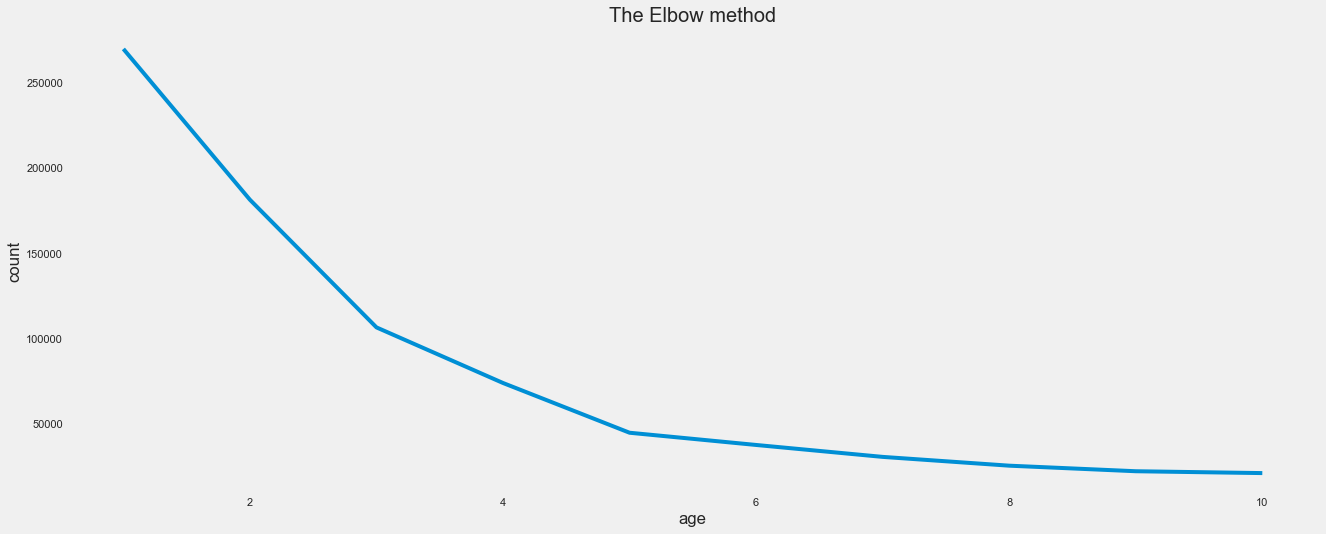

In [50]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method', fontsize = 20)
plt.xlabel('age')
plt.ylabel('count')
plt.grid()
plt.show()


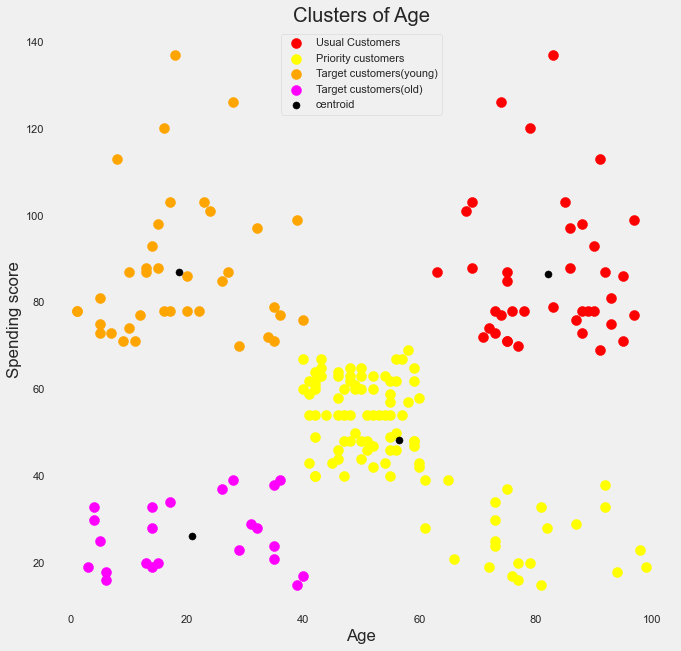

In [55]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c='red', label = 'Usual Customers')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c='yellow', label = 'Priority customers')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c='orange', label = 'Target customers(young)')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, c='magenta', label = 'Target customers(old)')
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], s = 50, c = 'black', label = 'centroid')
plt.title('Clusters of Age')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.grid()
plt.show()

In [71]:
#3d
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

x  = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

data['labels'] = labels
trace1 = go.Scatter3d(x = data['Age'], y = data['Spending Score (1-100)'], z = data['Annual Income (k$)'], mode = 'markers', marker = dict(color = data['labels'], size = 10, line = dict(color = data['labels'],width =12), opacity = 0.8))
df = [trace1]
layout = go.Layout(title = 'Charecter vs Gender vs Alive or not', margin = dict(l=0, r=0, b=0, t=0), scene = dict(xaxis = dict(title = 'Age'),yaxis = dict(title = 'Spending Score'),zaxis = dict(title = 'Annual Income')))
fig = go.Figure(trace1,layout)
fig.show()